In [38]:
# Pakete 
import matplotlib.pyplot as plt
import numpy as np

## Berechnungen zur Hausaufgabe
Hier sind alle wichtigen Rechnungen zur Hausaufgabe aufgeführt. Es wurden SI-Einheiten verwendet.
### Der Zug

In [39]:
N = 6                            # Anzahl der Wagons
m_Wagon = 21500                  # Masse des Wagons
n_Sitz = 46                      # Sitzplätze in einem Wagon
n_Wagon = 2*n_Sitz + n_Sitz      # maximale Kapaziät in einem Wagon
n_Wagon
n_max = N * n_Wagon              # maximale Kapazität im ganzen Zug
print("n_max:", n_max) 

auslastung = 0.85               # Auslastung 85%
n_ges = auslastung * n_max      # Pesonen im Zug
print("n_ges", n_ges)

n_max: 828
n_ges 703.8


Im folgenden gehen wir davon aus, dass im Zug 700 Personen sind. Studien ergeben, dass eine durchschnittliche Frau in der USA 76,4kg und der Mann im Durchschnitt 88,8kg wiegt. Geht man davon aus, dass im Zug gleich viele Männer wie Frauen sind, so gilt folgendes: 

In [40]:
n_ges = 700                     # Passagierzahl
m_Person = (88.8+76.4)/2        # Masse einer Person
m_Insassen = m_Person * n_ges   # Masse aller Insassen

m = N * m_Wagon + m_Insassen    # Gesamtmasse

print("Masse der Wagon:", N*m_Wagon)
print("Masse der Insassen:", m_Insassen)
print("Gesamtmasse:", m)

Masse der Wagon: 129000
Masse der Insassen: 57819.99999999999
Gesamtmasse: 186820.0


### Der Bremsvorgang

In [41]:
v0 = 80 * 0.44704       # Anfangsgeschwindigkeit
t = 45                  # Zeit zum Bremsen
F_Brems = m * (0-v0)/t  # Bremskraft
print("Kraft zum Bremsen:", F_Brems)

Kraft zum Bremsen: -148472.91164444442


## Die Fäden
Bei den Fäden kann mit der Formel $F=\sigma \cdot A$ ($\sigma$ ist Zugfestigkeit und $A$ die Querschnittsfläche). Es ist relativ schwer den Durchmesser eines Fadens zu bestimmen. Deshalb werden hier zwei Wege berechnet:
1. Das Fadenbündel (á 8 Fäden) hat einen Durchmesser von $d_f=0,02\mathrm m$ ein Faden hat dann also Durchmesser von $d_1= (0,02/8)\mathrm m$
2. Das Fadenbündel wird als eine Fläche berechnet. Danch wird diese durch 8 geteilt und mit der anderen Seite verrechnet.

In [42]:
sigma = 1.1*10**9
d_faden = 0.02

def Q(d):
    return np.pi*(d/2)**2
def F_n(d, q):                  # q ist ein Faktor, der die Querschnittsläche multipliziert.
    return sigma * q * Q(d)

#### Rechung 1

In [43]:
d1 = d_faden/8
print("Durchmesser eines Faden:", d1)
Q(d1)       # Querschnitt eines Fadens
q = 16      # insgesamt 16 Fäden
print("Kraft, die von den Fäden ausgeht:", F_n(d1, q))  # Kraft, die von den Fäden ausgeht

print("Anteil an der Benötigten Kraft:", F_n(d1, q)/abs(F_Brems))

Durchmesser eines Faden: 0.0025
Kraft, die von den Fäden ausgeht: 86393.79797371931
Anteil an der Benötigten Kraft: 0.5818825603731063


Nach dieser Rechenart ist die Rettungsaktion *nicht* möglich!

### Kraft von Fäden im Abhändigkeit von $d$

In [44]:

def quot(d, q):
    return F_n(d, q) / abs(F_Brems)

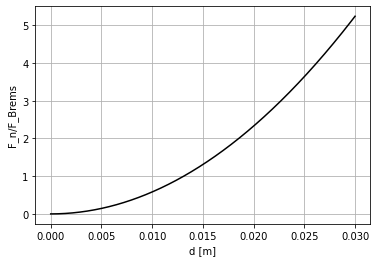

In [45]:
d = np.linspace(0, 0.03, 1000)
plt.grid()
plt.ylabel("F_n/F_Brems")
plt.xlabel("d [m]")
plt.plot(d, quot(d, 1), c = 'black')